<div style="text-align: right"> Diego Emiliano Rodea Ruano 

# Crecimiento Poblacional

El crecimiento poblacional o crecimiento demográfico es el cambio en la población en un cierto plazo. Puede ser cuantificado como el cambio en el número de individuos en una población por unidad de tiempo para su medición.

El modelo más simple de crecimiento poblacional de organismos es $\frac{𝑑𝑥}{𝑑𝑡} = 𝑟𝑥$, donde 𝑥(𝑡) es la población en el tiempo 𝑡 y 𝑟>0 es la tasa de crecimiento.

En realidad la tasa de crecimiento no es una constante, sino que depende de la población $\frac{𝑑𝑦}{𝑑𝑥}= 𝜇(𝑥)𝑥$

Cuando 𝑥 es pequeña 𝜇(𝑥)≈𝑟, como antes, pero cuando 𝑥>1 (población normalizada) 𝜇(𝑥)<0, es decir, la tasa de muerte es mayor a la tasa de nacimiento.

In [164]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
import matplotlib as mpl
num_ejes = 14
mpl.rcParams['xtick.labelsize'] = num_ejes
mpl.rcParams['ytick.labelsize'] = num_ejes

In [166]:
def mu(r,x):
    return r*(1-x)

In [167]:
r = 1     #Tasa máxima de crecimiento(de 0 a 1)
N = 200   #Número de puntos en la gráfica
x = np.linspace(0,1.2,N)

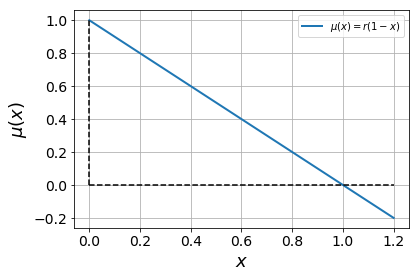

In [168]:
plt.figure()
plt.plot(x,mu(r,x), linewidth=2, label="$\mu(x)=r(1-x)$")
plt.plot(np.array([0,1.2]),np.array([0,0]),'--k')
plt.plot(np.array([0,0]), np.array([0,1]),'--k')
plt.legend(loc='best')
plt.grid()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$\mu(x)$",fontsize=18)
plt.show()

Como el crecimiento poblacional es una ecuación diferencial, esta sería su solucion:

$$
\frac{dx}{dt} = rx(1 - x)  \space\space\space \text{con solucion :} \space x(t) = \frac{1}{1+\left(\frac{1}{x_0}-1\right)e^{-rt}}
$$

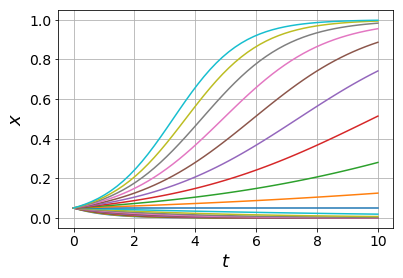

In [169]:
def logi_sol(t, x0, r):
    return 1/(1+(1/x0 - 1)*np.exp(-r*t))
t = np.linspace(0,10)     # Vector de tiempo
x0= 0.05   #condición inicial

#Graficámos para diferentes r
for r in np.arange(-1, 1, 0.1):
    plt.plot(t, logi_sol(t, x0, r))
    
plt.grid()
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$x$', fontsize = 18)
plt.show()

Resolviendo numéricamente la ecuación:

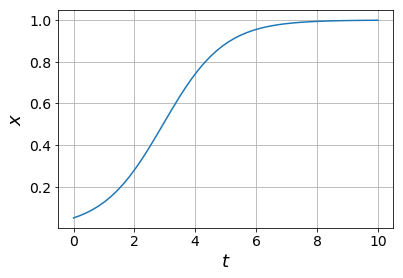

In [170]:
from scipy.integrate import odeint #Ecuaciones diferenciales ordinarias

#Ecuación logística para odeint
def poblacion(x, t, r):
    return(mu(r, x)*x)

r = 1
tt = t
xx = odeint(poblacion, x0, tt, (r,))  #Solución numérica

#Gráfico
plt.figure()
plt.plot(tt, xx)
plt.grid()
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$x$', fontsize = 18)
plt.show()

Hay ecuaciones diferenciales ordinarias no lineales para las cuales es imposible conseguir una solución exacta. En estos casos, se evalúa una solución aproximada de forma numérica

**Comparemos ambas soluciones (numérica y exacta)**

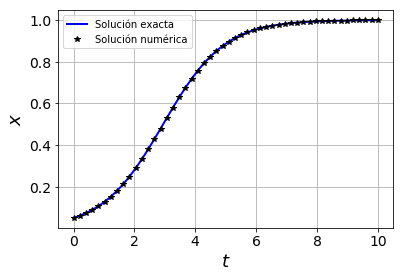

In [171]:
x_numerica = xx[:,0]
x_exacta = logi_sol(t,x0,r)

#Gráfico de la comparación
plt.figure()
plt.plot(t, x_exacta, '-b',lw=2, label='Solución exacta')
plt.plot(t, x_numerica, '*k' , label='Solución numérica')
plt.grid()
plt.legend(loc='best')
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$x$', fontsize = 18)
plt.show()

Valoremos el error, porque a simple vista parece exacta

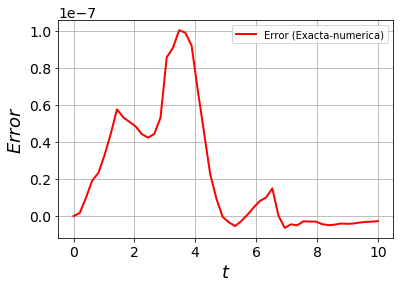

In [172]:
error = x_exacta - x_numerica
#Lo graficamos
plt.figure()
plt.plot(t, error, '-r', lw= 2, label='Error (Exacta-numerica)')
plt.grid()
plt.legend(loc='best')
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$Error$', fontsize = 18)
plt.show()

Juntemos ambas gráficas

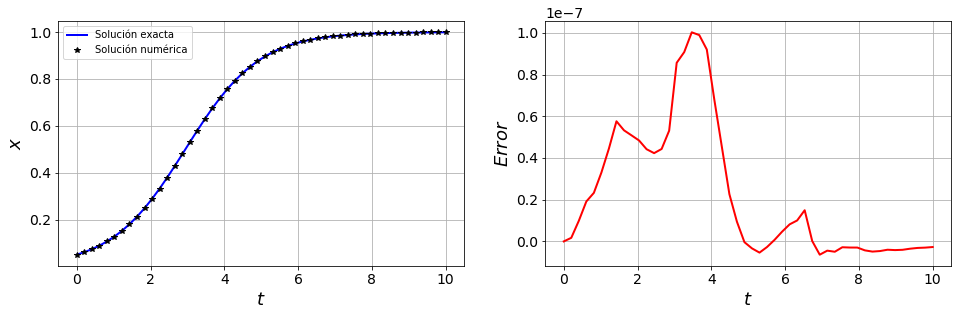

In [173]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4.5))

ax1.plot(t, x_exacta, '-b', lw=2, label='Solución exacta')
ax1.plot(t, x_numerica, '*k', label='Solución numérica')
ax1.grid()
ax1.legend(loc='best')
ax1.set_xlabel('$t$', fontsize = 18)
ax1.set_ylabel('$x$', fontsize = 18)


ax2.plot(t, error, '-r', lw=2, label = 'Error')
ax2.grid()
ax2.set_xlabel('$t$', fontsize = 18)
ax2.set_ylabel('$Error$', fontsize = 18)

plt.show()

Si nos fijamos el error es muy pequeño (e-7) por lo que nuestra solución numerica es suficientemente buena. Además podemos cuantificar cuanto ha sido el error con la fórmula de la norma del error:
$$
    ||e||=\sqrt{(e_0^2 + \dots + e_{n-1}^2)}\\
    \text{De igual manera podemos obtener el error cuadrático medio:}\\
    e_{ms} = \frac{e_0^2 + \dots + e_{n-1}^2}{n}
$$

In [174]:
np.linalg.norm(error), np.mean(np.sum(error**2))

(2.7486108664240486e-07, 7.55486169502436e-14)

De igual manera podemos ahcer una integral de error cuadrático:
$$
    e_{is}=\int_0^{t_f}e(t)^2dt \approx (e_0^2 + \dots + e_{n-1}^2)h
$$
donde $h$ es el tamño de paso del vector de tiempo

In [175]:
h = t[1]-t[0]
np.sum(error**2)*h

1.541808509188645e-14

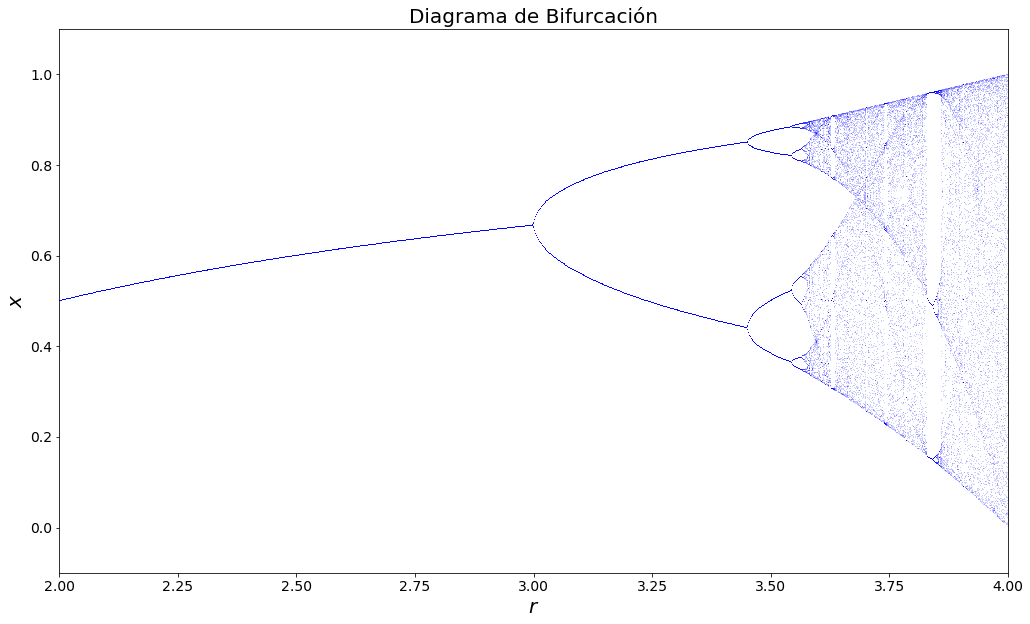

In [296]:
def mapa_logistico(r, x):
    return r * x * (1-x)

n = 1000
r = np.linspace(2, 4, n) #Valores de r de 2 a 4

iteraciones = 1000
ultimos = 100

#La misma Condición inicial para todos los casos
x = 1e-5 * np.ones(n)

#Gráfico
plt.figure(figsize=(17,10))
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        plt.plot(r, x, ',b', alpha= 0.2)
plt.xlim(np.min(r), np.max(r))
plt.ylim(-0.1, 1.1)
plt.title('Diagrama de Bifurcación', fontsize=20)
plt.xlabel('$r$', fontsize=20)
plt.ylabel('$x$', fontsize=20)
plt.show()

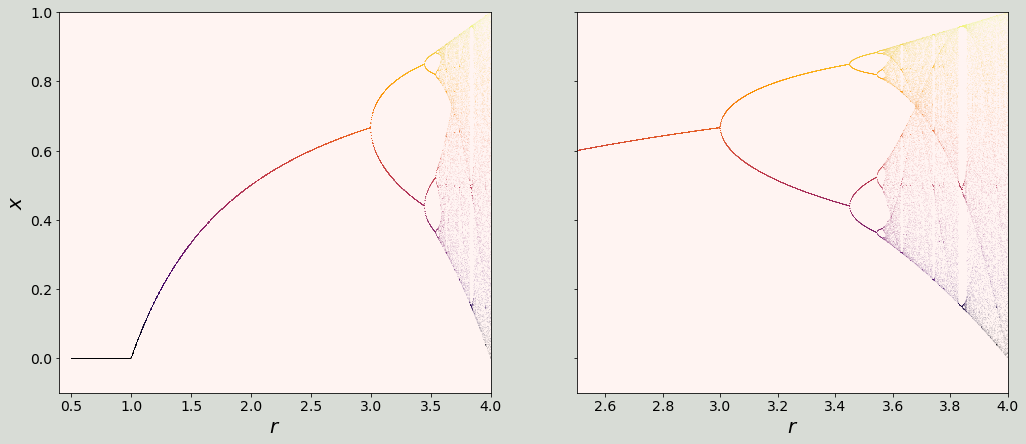

In [177]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col',sharey='row', figsize=(17,7))
r = np.linspace(0.5, 4.0, n)
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        ax1.scatter(r, x, s = 0.1, cmap='inferno', c = x, lw=0)
r = np.linspace(2.5, 4.0, n)
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >=(iteraciones - ultimos):
        ax2.scatter(r, x, s = 0.1, cmap='inferno', c = x, lw=0)
ax1.set_xlim(0.4, 4)
ax1.set_ylim(-0.1, 1.1)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-0.1, 1,1)
ax1.set_ylabel('$x$', fontsize = 20)
ax1.set_xlabel('$r$', fontsize = 20)
ax2.set_xlabel('$r$', fontsize = 20)

ax1.patch.set_facecolor('xkcd:very light pink')
ax2.patch.set_facecolor('xkcd:very light pink')
fig.patch.set_facecolor('xkcd:light grey')
plt.show()

## Hagamos dos ejemplos sencillos de crecimiento poblacional

México tiene una tasa de crecimiento poblacional de 1.15% al año, veamos en algunos años como crece nuestra población si al 2017 eramos 124.57 millones de personas

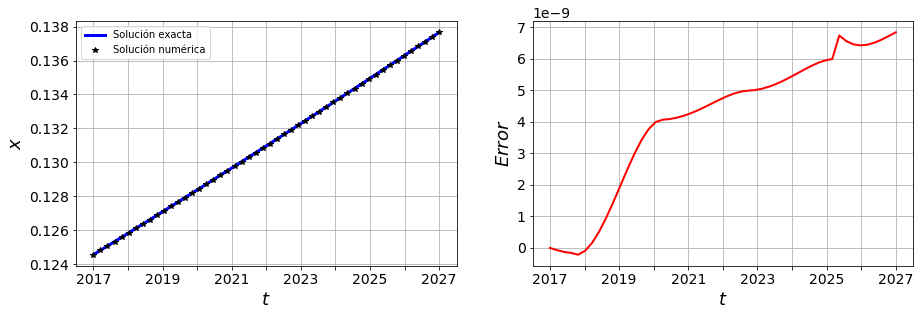

In [288]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4.5))

r=0.0115
x0=0.12457
t=np.linspace(0,10,50)
tt = t
xx = odeint(poblacion, x0, tt, (r,))  
x_numerica = xx[:,0]           #Solución numérica 
x_exacta = logi_sol(t,x0,r)     #Solución exacta
error = x_exacta - x_numerica   #Error 


#Gráfico de la comparación
ax = plt.gca()
ax1.set_xticks(np.arange(0,11,1))
ax2.set_xticks(np.arange(0,11,1))
a=2017
labels = [item.get_text() for item in ax1.get_xticklabels()]
for i in range(0,len(labels)):
    labels[i]='%i'%(a)
    a=a+1
    
ax1.set_xticklabels(labels)
ax2.set_xticklabels(labels)

ax1.plot(t, x_exacta, '-b',lw=3, label='Solución exacta')
ax1.plot(t, x_numerica, '*k' , label='Solución numérica')
ax1.grid()
ax1.legend(loc='best')
ax1.set_xlabel('$t$', fontsize = 18)
ax1.set_ylabel('$x$', fontsize = 18)

ax2.plot(t, error, '-r', lw=2, label = 'Error')
ax2.grid()
ax2.set_xlabel('$t$', fontsize = 18)
ax2.set_ylabel('$Error$', fontsize = 18)

plt.setp(ax1.get_xticklabels()[1:11:2], visible=False)
plt.setp(ax2.get_xticklabels()[1:11:2], visible=False)
plt.show()

En la gráfica podermos ver que en 2027 vamos a ser cerca de 137.5 millones de personas

Para poder ver el error podemos integrar:

In [289]:
h = t[1]-t[0]
np.sum(error**2)*h

2.2055770255742037e-16

### Ejemplo 2

Luxemburgo tiene una tasa de crecimiento de 3% anual(2017) y una población de 590 667.

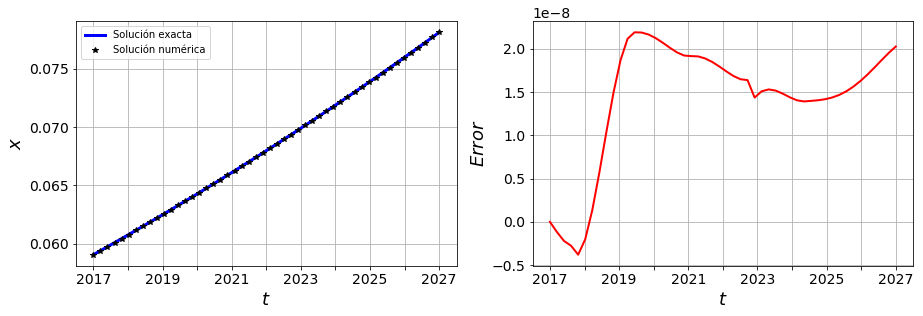

In [290]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4.5))

r=0.03
x0=0.0590667
t=np.linspace(0,10,50)
tt = t
xx = odeint(poblacion, x0, tt, (r,))  
x_numerica = xx[:,0]           #Solución numérica 
x_exacta = logi_sol(t,x0,r)     #Solución exacta
error = x_exacta - x_numerica   #Error 


#Gráfico de la comparación
ax = plt.gca()
ax1.set_xticks(np.arange(0,11,1))
ax2.set_xticks(np.arange(0,11,1))
a=2017
labels = [item.get_text() for item in ax1.get_xticklabels()]
for i in range(0,len(labels)):
    labels[i]='%i'%(a)
    a=a+1
    
ax1.set_xticklabels(labels)
ax2.set_xticklabels(labels)

ax1.plot(t, x_exacta, '-b',lw=3, label='Solución exacta')
ax1.plot(t, x_numerica, '*k' , label='Solución numérica')
ax1.grid()
ax1.legend(loc='best')
ax1.set_xlabel('$t$', fontsize = 18)
ax1.set_ylabel('$x$', fontsize = 18)

ax2.plot(t, error, '-r', lw=2, label = 'Error')
ax2.grid()
ax2.set_xlabel('$t$', fontsize = 18)
ax2.set_ylabel('$Error$', fontsize = 18)

plt.setp(ax1.get_xticklabels()[1:11:2], visible=False)
plt.setp(ax2.get_xticklabels()[1:11:2], visible=False)
plt.show()

Para el 2027 tendrá 758 mil personas, con un error de:

In [291]:
h = t[1]-t[0]
np.sum(error**2)*h

2.6015924776087718e-15

Los diagramas de bifurcación en este caso nos da la familia de soluciones de la ecuación diferencial, los valores estables de la solución están como lineas, mientras que los valores inestables están en forma de lineas punteadas. 

Estos diagramas de bifurcación nos podrían ayudar a ver las órbitas de los átomos, así como un diagrama de energías

En conclusión aunque el crecimiento poblacional pudiera parecer en forma de J, esta tiende mas a forma de S ya que no existen recursos ilimitados. Este crecimiento está dado por una ecuación diferencial ordinaria cuya familia de soluciones puede llegar a ser caótica o sin solución, por lo que lo aproximamos a valores numéricos.